### Examen 2 Paradigmas

- Acosta Imandt Daniel
- Barón Bárcenas Iván
- Castillo del Valle Pablo Davil

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

<h1>Ejercicio 1</h1>



<Figure size 432x288 with 0 Axes>

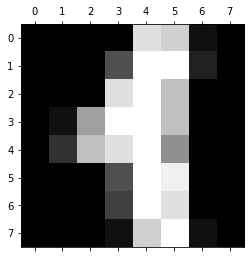

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#Importamos los datos
digits = load_digits()
plt.gray()
plt.matshow(digits.images[11])
plt.show()

In [3]:
from sklearn.cluster import KMeans
import numpy as np
print(type(digits))
#Observemos que el tipo de dato que es digits es BUNCH, vieno la documentación en https://bit.ly/3CGbGyj
#Nos damos cuenta que es como un diccionario, procedemos a ver su contenido
n=0
print(digits.keys())
#Los datos que codifican la imagen
print(digits["data"][n])
#Target es el número que representa esta entrada
print(digits["target"][n])
#Como as_frame no es TRUE, el valor es NONE
print(digits["frame"])
#El nombre de esta columna
print(digits["feature_names"][n])
#El nombre de la clase target, en este caso coincide con target
print(digits["target_names"][n])
#Son los valores de data, pero expresadas en forma matricial en formato para graficar como imágen
print(digits["images"][n])
#print(digits["DESCR"])

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0
None
pixel_0_0
0
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [4]:
#Leyendo la documentación en https://bit.ly/3CGbGyj
#Podemos notaar que una manera más conveniente para nosotros para poder procesar los datos es usando
#X_Y=true, ya que en este caso nos regresa un arreglo con dos arreglos que solamente contienen el apartado de data, y target del BUNCH
#Comprobamos que esto es cierto
digits2 = load_digits(return_X_y=True)
print(digits2[0][0])
print(digits2[1][0])
print(len(digits2[0][1]))

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0
64


<h1>K-medias</h1>

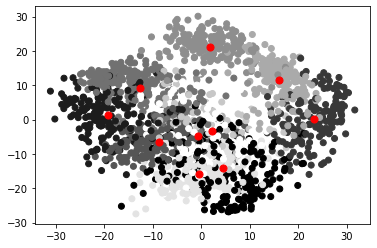

In [5]:
#Intentamos reducir la dimensionalidad a dos pero los resultados no fueron los esperados, sin embargo 
#Dejamos esta sección del código ya que nos da una manera fácil de vizualizar los datos
dimred=PCA(n_components=64).fit_transform(digits2[0])
#K medias
kmeansmodel=KMeans(init="k-means++", n_clusters=10, n_init=4)
kmeansmodel.fit(dimred)
y_hat=kmeansmodel.fit_predict(dimred)
C=kmeansmodel.cluster_centers_
#Graficamos
fig,ax=plt.subplots()
ax.scatter(dimred[:,0],dimred[:,1],c=y_hat)
ax.scatter(C[:,0],C[:,1],marker='.',s=200,c='red')

<h1>Aglomerativo</h1>

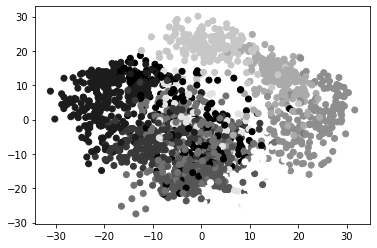

In [6]:
from sklearn.cluster import AgglomerativeClustering
#Aglomeración
clustering=AgglomerativeClustering(n_clusters=10).fit(dimred)
y_hat2=clustering.fit_predict(dimred)
#graficamos
fig,ax=plt.subplots()
ax.scatter(dimred[:,0],dimred[:,1],c=y_hat2)

<h1>Gaussian Mixture</h1>

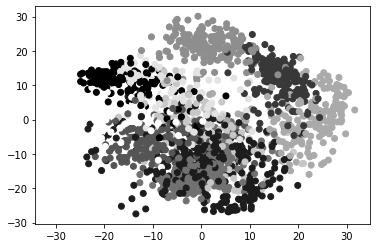

In [7]:
import numpy as np
from sklearn.mixture import GaussianMixture
#Mezcla Gaussiana
gauss=GaussianMixture(n_components=10).fit(dimred)
y_hat3=gauss.fit_predict(dimred)
#Graficamos
fig,ax=plt.subplots()
ax.scatter(dimred[:,0],dimred[:,1],c=y_hat3)

<h1>Métricas de evaluación</h1>

Datos reales o target


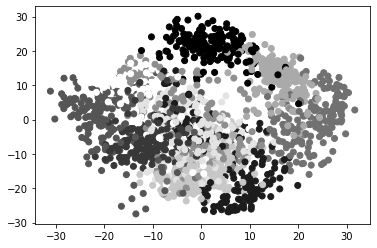

In [8]:
#print(digits2[1])
#print(y_hat)
#print(y_hat2)
#print(y_hat3)

#Graficamos los datos reales, solamente para ver si se parecen a los resultados obtenidos
y_hat0=digits2[1]
fig,ax=plt.subplots()
ax.scatter(dimred[:,0],dimred[:,1],c=y_hat0)
print("Datos reales o target")

Ahora evaluamos las metricas de evaluación de los resultados para cada modelo.

In [9]:
from sklearn import metrics

#Imprimimos las métricas
predicciones=[["K-medias",y_hat], ["Aglomeracion",y_hat2], ["Mezcla Gaussiana",y_hat3]]
for i in range(len(predicciones)):
  print(f"Rand Index score  de {predicciones[i][0]}= {metrics.rand_score(y_hat0, predicciones[i][1])}")
print("\n")
for i in range(len(predicciones)):
  print(f"Mutual information based score  de {predicciones[i][0]}= {metrics.adjusted_mutual_info_score(y_hat0, predicciones[i][1])}")

print("\n")
for i in range(len(predicciones)):
  print(f"Homogeneity score  de {predicciones[i][0]}= {metrics.homogeneity_score(y_hat0, predicciones[i][1])}")

print("\n")
for i in range(len(predicciones)):
  print(f"Completeness score  de {predicciones[i][0]}= {metrics.completeness_score(y_hat0, predicciones[i][1])}")

print("\n")
for i in range(len(predicciones)):
  print(f"V-measure score  de {predicciones[i][0]}= {metrics.v_measure_score(y_hat0, predicciones[i][1])}")

print("\nPodemos notar que nuestro agrupamiento más efectivo fue el de aglomeración, seguido por el de mezcla Gaussiana y en último lugar el de K-medias")

Rand Index score  de K-medias= 0.9386133533617648
Rand Index score  de Aglomeracion= 0.9612333349445314
Rand Index score  de Mezcla Gaussiana= 0.9330850848915477


Mutual information based score  de K-medias= 0.7378763178150937
Mutual information based score  de Aglomeracion= 0.8668321489750319
Mutual information based score  de Mezcla Gaussiana= 0.7381016721993003


Homogeneity score  de K-medias= 0.7364437087073696
Homogeneity score  de Aglomeracion= 0.8575128719504723
Homogeneity score  de Mezcla Gaussiana= 0.7355887726241369


Completeness score  de K-medias= 0.7445790433060442
Completeness score  de Aglomeracion= 0.8790955851724198
Completeness score  de Mezcla Gaussiana= 0.7459145567950318


V-measure score  de K-medias= 0.7404890320997878
V-measure score  de Aglomeracion= 0.8681701126909083
V-measure score  de Mezcla Gaussiana= 0.7407156803764321

Podemos notar que nuestro agrupamiento más efectivo fue el de aglomeración, seguido por el de mezcla Gaussiana y en último lugar el d

<h1>Ejercicio 3</h1>

In [10]:
# Primero cargamos los datos que se nos piden
x, y  = make_multilabel_classification(n_samples=200,n_features=5,n_classes=3,n_labels=1)

In [11]:
# Proseguimos a agarrar 3 de las características para hacer una gráfica
X1=[i[0] for i in x]
X2=[i[1] for i in x]
X3=[i[2] for i in x]

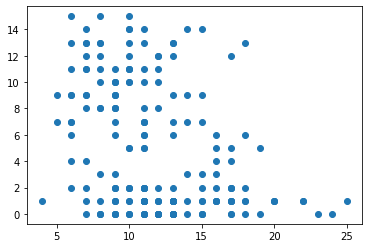

In [12]:
# Comparamos la primer característica contra la segunda
plt.scatter(X1,X2)

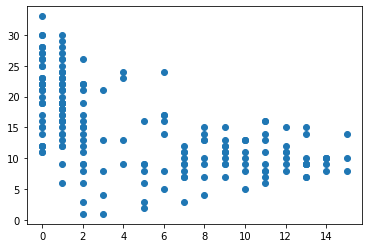

In [13]:
# Comparamos la segunda característica contra la tercera
plt.scatter(X2,X3)

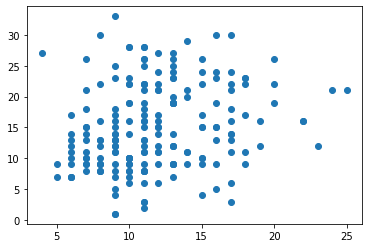

In [14]:
# Comparamos la primer característica contra la tercera
plt.scatter(X1,X3)

Esto no se ve muy bonito por lo que lo hacemos en 3D

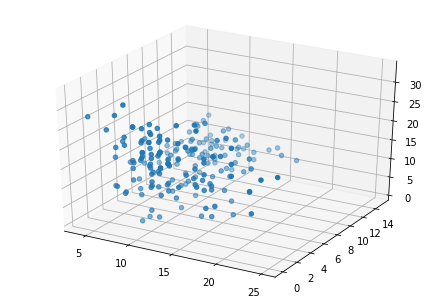

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1, X2, X3)


Ahora vamos a dividir nuestros datos en conjuntos de entrenamiento y de prueba.

Proseguimos a entrenar el modelo para 5 k-vecinos diferentes y mostyramos el accuracy de cada uno.

In [16]:
#Dividimos los datos y clasificamos para vecinos diferentes ,mostramos el accuracy
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1)

knn1 = KNeighborsClassifier(n_neighbors = 5) 
knn1.fit(X_train, y_train)
print('Tenemos que el accuracy para k=5: ',(knn1.score(X_test, y_test),5))
knn1 = KNeighborsClassifier(n_neighbors = 10) 
knn1.fit(X_train, y_train)
print('Tenemos que el accuracy para k=10:',(knn1.score(X_test, y_test),10))
knn1 = KNeighborsClassifier(n_neighbors = 15) 
knn1.fit(X_train, y_train)
print('Tenemos que el accuracy para k=15:',(knn1.score(X_test, y_test),15))
knn1 = KNeighborsClassifier(n_neighbors = 20) 
knn1.fit(X_train, y_train)
print('Tenemos que el accuracy para k=20: ',(knn1.score(X_test, y_test),20))
knn1 = KNeighborsClassifier(n_neighbors = 3) 
knn1.fit(X_train, y_train)
print('Tenemos que el accuracy para k=3:',(knn1.score(X_test, y_test),3))

Tenemos que el accuracy para k=5:  (0.72, 5)
Tenemos que el accuracy para k=10: (0.74, 10)
Tenemos que el accuracy para k=15: (0.64, 15)
Tenemos que el accuracy para k=20:  (0.62, 20)
Tenemos que el accuracy para k=3: (0.76, 3)


<h1>Ejercicio 4</h1>

Vamos a cargar conjuntos de noticias diferentes donde vamos a agarrar los conjuntos de 'sci.crypt','sci.electronics','sci.med','sci.space','talk.religion.misc'

In [17]:
from sklearn.datasets import fetch_20newsgroups

c=['sci.crypt','sci.electronics','sci.med','sci.space','talk.religion.misc']
Data = fetch_20newsgroups(subset='train',categories=c)


Dividimos nuestro conjunto en entrenamiento y prueba.

In [18]:
X=Data.data
y=Data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)



Ahora aplicamos BoW con CountVectorizer

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
X_train_count=count.fit_transform(X_train)
X_test_count=count.transform(X_test)


Ahora obtenemos las frecuencias con TfidfTransformer

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
trans=TfidfTransformer(use_idf=False) 
X_train_freq=trans.fit_transform(X_train_count)
X_test_freq=trans.transform(X_test_count)
X_train_freq
X_test_freq

<688x38316 sparse matrix of type '<class 'numpy.float64'>'
	with 109901 stored elements in Compressed Sparse Row format>

Aplicamos el clasificador beysiano

In [21]:
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()
nb.fit(X_train_freq,y_train)


MultinomialNB()

Por ultimo calculamos las metricas de evaluación del modelo

In [22]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_hat = nb.predict(X_test_freq)
print('Accurracy:', accuracy_score(y_test, y_hat))
#print('precision:',precision_score(y_test,y_hat))
#print('recall:',recall_score(y_test,y_hat))
#print('f1:',f1_score(y_test,y_hat))
# Al calcular las otras metricas de evaluación marca error, por lo que le agregamos el parámetro de avarage igual a weighted

print("Precision Score : ",precision_score(y_test, y_hat, 
                                           pos_label='positive',
                                           average='weighted'))
print("Recall Score : ",recall_score(y_test, y_hat, 
                                           pos_label='positive',
                                           average='weighted'))
print("f1 : ",f1_score(y_test, y_hat, 
                                           pos_label='positive',
                                           average='weighted'))

Accurracy: 0.8270348837209303
Precision Score :  0.8594435041035667
Recall Score :  0.8270348837209303
f1 :  0.7823326012452839


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


<h1>Ejercicio 6</h1>

In [23]:
import seaborn as sns


import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Nota, modificamos nuestro  dataframe en excel para corregir cosas como las fechas,utilizamos el municipio de Tlaxcala. 

### Municipio de Tlaxcala

In [24]:
df = pd.read_csv( '/content/Casos_Diarios_Municipio_Confirmados_20211125 (1).csv', index_col='fecha')
df = df.T 
df.head()

fecha,casos
26-02-2020,0
27-02-2020,0
28-02-2020,0
29-02-2020,0
1/3/2020,0


### Hacemos la serie de tiempo

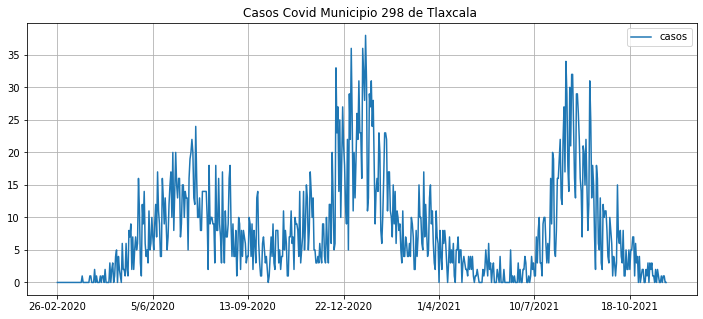

In [25]:
plt.figure(figsize=(12,5))
df.casos.plot(legend=True)
plt.title('Casos Covid Municipio 298 de Tlaxcala ')
plt.grid()
plt.show()

Como podemos ver ha habido tres olas de contagios , la primera por julio del 2020, luego enero 2021 y por ultimo julio 2021, que tiene sentido conforme a lo que nosotros vivimos y vimos en las noticias.

### Obtenemos la gráfica de correlacióm

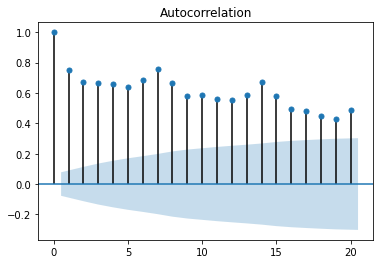

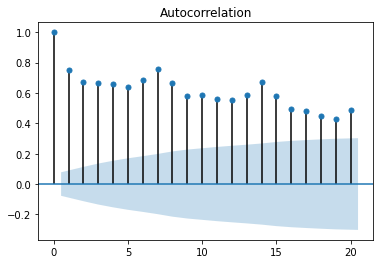

In [26]:
sm.graphics.tsa.plot_acf(df.values,lags=20)

Podemos ver que la correlación es baja para días cercanos y va bajando conforme pasan los días, así mismo notamos que la correlación aumenta cada 7 días, de aquí podriamos concluir que como que las pruebas de covid que se hacen en algún día a la semana va a ser parecido al de la proxima semana, por poner un ejemplo, puede que las personas se esperen al sábado para hacerse la prueba.

---



### Suavizado exponencial

Ahora sacamos el suavizado exponencial con códigos que vimos en clase.

In [27]:
#Esta también la sacamos de la clase
def exponential_smoothing ( series , alpha ):
  result = [ series [0]] # el primer valor es el mismo de la serie
  for n in range (1 , len ( series )):
    result . append ( alpha * series [n] + (1 - alpha ) * result [n -1])
  return result
# Dentro de Python se encuentra en :
# from statsmodels . tsa . api import SimpleExpSmoothing

In [28]:
# Vista en clase
def plotExponentialSmoothing ( series , alphas ):
  with plt . style . context ('seaborn-white'):
    plt.figure ( figsize =(15 , 7))
    for alpha in alphas :
      plt . plot ( exponential_smoothing ( series , alpha ),label =" Alpha {}". format ( alpha ))
    plt.plot ( series.values , " c" , label = " Real ")
    plt . legend ( loc =" best ")
    plt . axis ('tight')
    plt . title ('Suavizado')
    plt . grid ( True );

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location ' best '. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


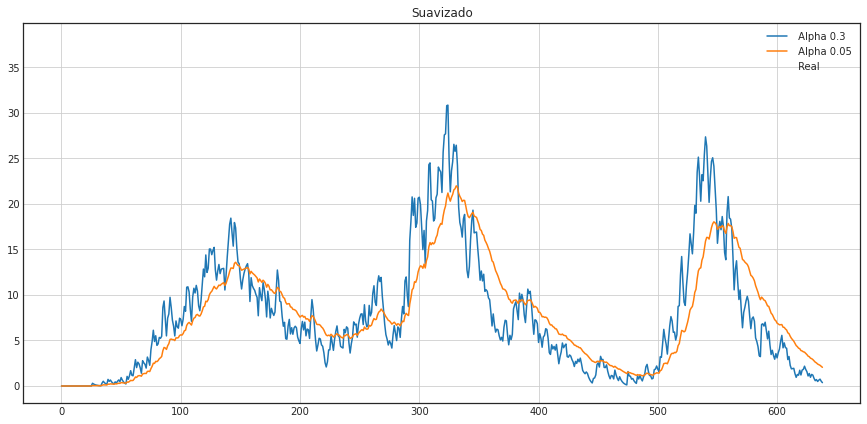

In [29]:
# Ploteamos nuestra exponencial suavizada
plotExponentialSmoothing(df.casos, [0.3 , 0.05])


### Regresión lineal

Ahora hacemos regresión lineal

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit ( n_splits =5)

In [31]:
# Función vista en clase
def timeseries_train_test_split (X , y , test_size ):
  test_index = int ( len ( X )*(1 - test_size ))
  X_train=X.iloc[: test_index ]
  y_train=y.iloc[: test_index ]
  X_test=X.iloc[ test_index :]
  y_test=y.iloc[ test_index :]
  return X_train , X_test , y_train , y_test

#limpiamos datos
y=df.dropna()
X=df.dropna()

X_train,X_test,y_train, y_test = timeseries_train_test_split(X,y,test_size =0.3)




In [32]:
X_train=[]
for i in range(447):
  X_train.append(i)

X_test=[]
for i in range(192):
  X_test.append(i)


In [33]:
# dividimos nuestros conjuntos de prueba y entrenamiento
X_train = np.array(X_train).reshape((-1,1))
X_test = np.array(X_test).reshape((-1,1))
y_train=np.array(y_train).reshape(-1, 1)
y_test=np.array(y_test).reshape(-1, 1)

In [34]:
#Hacemos nuestra regresión linear
lr =LinearRegression()
lr.fit( X_train , y_train )

LinearRegression()

In [35]:
#función vista en clase
def plotModelResults(model , X_train , X_test , y_train , y_test , plot_intervals=False , scale=1.96):
  """ Gráfica del modelo vs valores reales con intervalo de predicción """
  pred = model.predict(X_test)
  plt.figure(figsize =(15, 7))
  plt.plot(pred, "g", label=" predicción", linewidth =2.0)
  plt.plot(y_test ,'b' ,label="real", linewidth =2.0)
  # intervalos
  if plot_intervals:
    # Aquí usamos cross_val_score
    cv = cross_val_score(model , X_train , y_train , cv=tscv , scoring = "neg_mean_absolute_error ")
    #
    mae=cv.mean()*-1
    dev =cv.std()
    los=pred-(mae+scale*dev)
    upp=pred+(mae+scale*dev)
    plt.plot(low,'r--', label='limites superior / inferior',alpha=0.5)
    plt.plot(upp,'r--', alpha=0.5)

  error = mean_absolute_percentage_error(pred , y_test)
  plt.title("Error absoluto promedio {0:.2f} %".format(error))
  plt.legend(loc="best")
  plt.grid(True)
  plt.show

ValueError: ignored

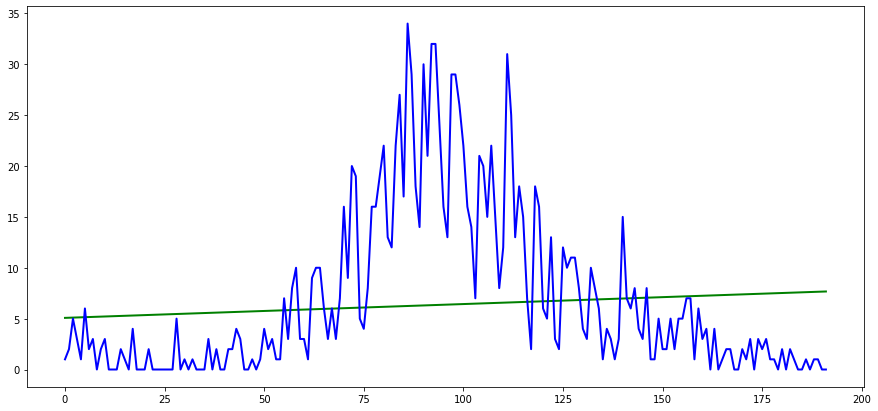

In [36]:
# gráficamos nuestro modelo
plotModelResults(lr, X_train , X_test , y_train , y_test , plot_intervals=True)

### Predicciones 

Por ultimo vamos a tratar de predecir para 8 y 15 días, esto lo haremos con Holt-Winters

In [37]:
# Importamos nuestra librería
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [38]:
# Dividimos nuestros datos de prueba y de entrenamiento
df_train=df.iloc[:-8]
df_test=df.iloc[-8:]

In [39]:
#Hacemos el ajuste
model=HWES(df_train,seasonal_periods=12, trend='add')
fitted = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [40]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  631
Model:             ExponentialSmoothing   SSE                          13449.045
Optimized:                         True   AIC                           1938.455
Trend:                         Additive   BIC                           1956.244
Seasonal:                          None   AICC                          1938.589
Seasonal Periods:                  None   Date:                 Fri, 26 Nov 2021
Box-Cox:                          False   Time:                         16:53:29
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2430511                alpha                 True
smoothing_slope             0.0000

In [41]:
sales_forecast = fitted.forecast(steps=8)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


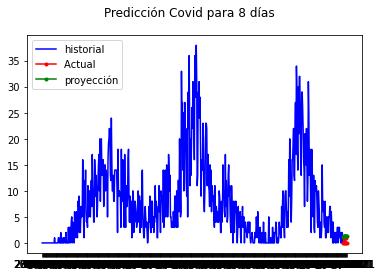

In [42]:
#Vemos nuestra gráfica con valores históricos nuestra proyección y los valores reales
fig = plt.figure()
fig.suptitle('Predicción Covid para 8 días')
past, = plt.plot(df_train.index, df_train, 'b', label='historial')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual ')
predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='proyección')
plt.legend(handles=[past, future, predicted_future])
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


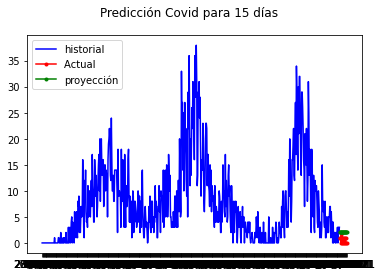

In [43]:
# Dividimos nuestros datos de prueba y de entrenamiento
df_train=df.iloc[:-15]
df_test=df.iloc[-15:]

#Hacemos el ajuste
model=HWES(df_train,seasonal_periods=12, trend='add')
fitted = model.fit()


sales_forecast = fitted.forecast(steps=15)

#Vemos nuestra gráfica con valores históricos nuestra proyección y los valores reales
fig = plt.figure()
fig.suptitle('Predicción Covid para 15 días')
past, = plt.plot(df_train.index, df_train, 'b', label='historial')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual ')
predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='proyección')
plt.legend(handles=[past, future, predicted_future])
plt.show()

## Ahora que hicimos los municipios pasamos a estado que fue Jalisco

### Jalisco

In [44]:
df = pd.read_csv( '/content/Casos_Diarios_Estado_Nacional_Confirmados_20211125 (1).csv', index_col='fecha')
df = df.T 
df.head()

fecha,casos
26-02-2020,0
27-02-2020,0
28-02-2020,0
29-02-2020,0
1/3/2020,0


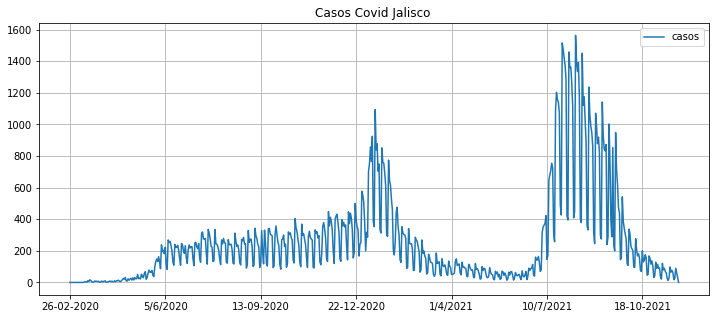

In [45]:
plt.figure(figsize=(12,5))
df.casos.plot(legend=True)
plt.title('Casos Covid Jalisco ')
plt.grid()
plt.show()

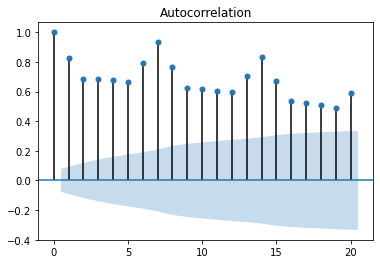

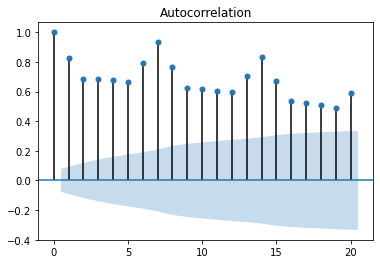

In [46]:
sm.graphics.tsa.plot_acf(df.values,lags=20)

Notamos los mismos resultados que con la autocorrelacción de municipios.

In [47]:
#Esta también la sacamos de la clase
def exponential_smoothing ( series , alpha ):
  result = [ series [0]] # el primer valor es el mismo de la serie
  for n in range (1 , len ( series )):
    result . append ( alpha * series [n] + (1 - alpha ) * result [n -1])
  return result
# Dentro de Python se encuentra en :
# from statsmodels . tsa . api import SimpleExpSmoothing

In [48]:
# Vista en clase
def plotExponentialSmoothing ( series , alphas ):
  with plt . style . context ('seaborn-white'):
    plt.figure ( figsize =(15 , 7))
    for alpha in alphas :
      plt . plot ( exponential_smoothing ( series , alpha ),label =" Alpha {}". format ( alpha ))
    plt.plot ( series.values , " c" , label = " Real ")
    plt . legend ( loc =" best ")
    plt . axis ('tight')
    plt . title ('Suavizado')
    plt . grid ( True );

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location ' best '. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


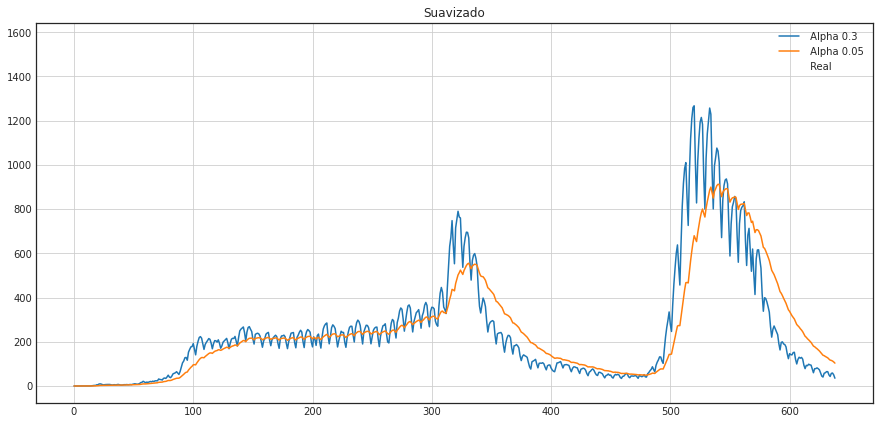

In [49]:
# Ploteamos nuestra exponencial suavizada
plotExponentialSmoothing(df.casos, [0.3 , 0.05])


In [50]:
# Función vista en clase
def timeseries_train_test_split (X , y , test_size ):
  test_index = int ( len ( X )*(1 - test_size ))
  X_train=X.iloc[: test_index ]
  y_train=y.iloc[: test_index ]
  X_test=X.iloc[ test_index :]
  y_test=y.iloc[ test_index :]
  return X_train , X_test , y_train , y_test

#limpiamos datos
y=df.dropna()
X=df.dropna()

X_train,X_test,y_train, y_test = timeseries_train_test_split(X,y,test_size =0.3)



In [51]:
X_train=[]
for i in range(447):
  X_train.append(i)

X_test=[]
for i in range(192):
  X_test.append(i)

In [52]:
# dividimos nuestros conjuntos de prueba y entrenamiento
X_train = np.array(X_train).reshape((-1,1))
X_test = np.array(X_test).reshape((-1,1))
y_train=np.array(y_train).reshape(-1, 1)
y_test=np.array(y_test).reshape(-1, 1)

In [53]:
#Hacemos nuestra regresión linear
lr =LinearRegression()
lr.fit( X_train , y_train )

LinearRegression()

ValueError: ignored

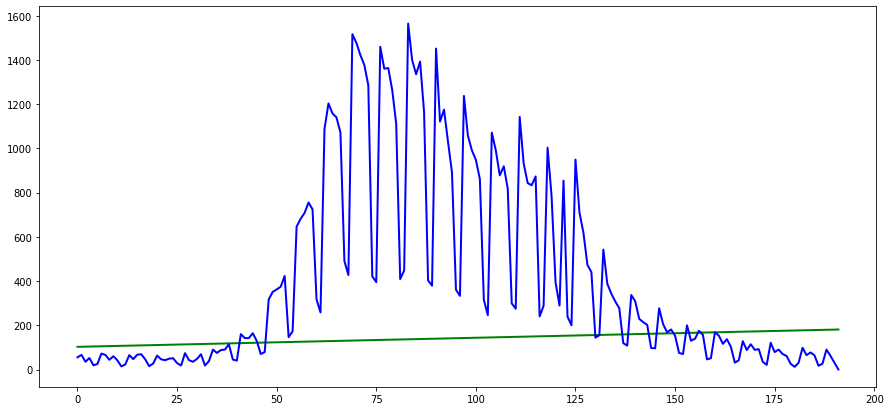

In [54]:
# gráficamos nuestro modelo
plotModelResults(lr, X_train , X_test , y_train , y_test , plot_intervals=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


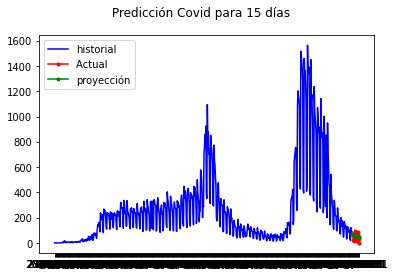

In [55]:
# Dividimos nuestros datos de prueba y de entrenamiento
df_train=df.iloc[:-15]
df_test=df.iloc[-15:]

#Hacemos el ajuste
model=HWES(df_train,seasonal_periods=12, trend='add')
fitted = model.fit()


sales_forecast = fitted.forecast(steps=15)

#Vemos nuestra gráfica con valores históricos nuestra proyección y los valores reales
fig = plt.figure()
fig.suptitle('Predicción Covid para 15 días')
past, = plt.plot(df_train.index, df_train, 'b', label='historial')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual ')
predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='proyección')
plt.legend(handles=[past, future, predicted_future])
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


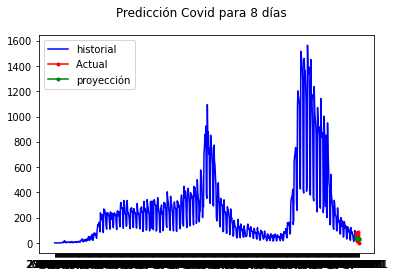

In [56]:
# Dividimos nuestros datos de prueba y de entrenamiento
df_train=df.iloc[:-8]
df_test=df.iloc[-8:]

#Hacemos el ajuste
model=HWES(df_train,seasonal_periods=12, trend='add')
fitted = model.fit()


sales_forecast = fitted.forecast(steps=8)

#Vemos nuestra gráfica con valores históricos nuestra proyección y los valores reales
fig = plt.figure()
fig.suptitle('Predicción Covid para 8 días')
past, = plt.plot(df_train.index, df_train, 'b', label='historial')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual ')
predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='proyección')
plt.legend(handles=[past, future, predicted_future])
plt.show()

<h1>Ejercicio 7</h1>

Elegimos utilizar el modelo del ejercicio 1  ahora crearemos un pipline para tratar de replicar los resultados, y en efecto obtuvimos los mismos valores que cuando lo hicimos como nos lo pedian en el 1

In [57]:
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#Pipeline framework para clustering y obtención de scores
def ClusterPipe(clustermodel, name, data, labs):
  estimador= make_pipeline(StandardScaler(), clustermodel).fit(data)
  mets=[metrics.homogeneity_score, metrics.completeness_score, metrics.v_measure_score, metrics.adjusted_rand_score, metrics.adjusted_mutual_info_score,]
  results = [name]
  results+=[m(labs, estimador[-1].fit_predict(data)) for m in mets]
  formatter_result=("{:16s}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
  print(formatter_result.format(*results))

space=" "
print(f"Método{space*10}\thomo\tcompl\tv-ms\tARI\tAMI")

#Usamos nuestro pipeline con k-medias
kmeansmodel=KMeans(init="k-means++", n_clusters=10)
ClusterPipe(kmeansmodel, name="K-medias", data=dimred, labs=y_hat0)


#Usamos nuestro framework Aglomeración
clustering=AgglomerativeClustering(n_clusters=10)
ClusterPipe(clustering, name="Aglomeracion", data=dimred, labs=y_hat0)

#Usamos nuestro framework Mezcla Gaussiana
gauss=GaussianMixture(n_components=10)
ClusterPipe(gauss, name="Mezcla Gaussiana", data=dimred, labs=y_hat0)

#Usamos nuestro framework con dos pipelines distintos para hacer K-medias y luego Mezcla Gaussiana y para hacer K-medias y luego Aglomeración
ClusterPipe(Pipeline([("kmeans",KMeans(init="k-means++", n_clusters=10)),("gauss",GaussianMixture(n_components=10))]), name="Kmedias+Gauss", data=dimred, labs=y_hat0)
ClusterPipe(Pipeline([("kmeans",KMeans(init="k-means++", n_clusters=10)),("agg",AgglomerativeClustering(n_clusters=10))]), name="Kmedias+Agglo", data=dimred, labs=y_hat0)

Método          	homo	compl	v-ms	ARI	AMI
K-medias        	0.737	0.753	0.747	0.667	0.742
Aglomeracion    	0.858	0.879	0.868	0.794	0.867
Mezcla Gaussiana	0.716	0.743	0.763	0.677	0.701
Kmedias+Gauss   	0.752	0.766	0.755	0.641	0.726
Kmedias+Agglo   	0.729	0.728	0.724	0.573	0.724
